<h2><font style="font-weight:lighter", color='960018'>Introduction</font></h2>

<font color='#3c3c3c'>You've created a game application, it runs well, you made some money, but you want to increase your profit, and you think that changing the home page will increase the number of subscribers and then the profit, but you're not very sure about that, now you're thinking of applying the change for 4 weeks, and see what will happen, how many new subsribers you will get, compared to the previous 4 weeks. This approach is very naive, risky and not reliable for the following reasons:</font>
<font color='#3c3c3c'>
<ul>
<li>The change may have an opposite effect and make potential subsribers leave the app for ever, you will end up with a loss of time/effort and money</li>
<li>If you notice a positive impact, you're not sure if this is because of the change you made, or just a seasonal increase or may be some butterfly effect caused by other factors.</li>
</ul></font>
<font color='#3c3c3c'>Here where AB testing comes to the rescue, In a nutshell, you'll consider two equally-sized groups A and B, usually called control group and treatment group, you expose the treatment group (B) to the new home page and control group (A) to the old one, run the experiment and gather the result data for the two groups, and then apply hypothesis testing to see if the difference is significant or not, based on the analysis, you decide whether you can apply the change or just keep the old landing page.</font>

<h2><font style="font-weight:lighter", color='960018'>Import libraries and data</font></h2>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

<h4>Description of fields</h4>
<br>
<li>user_id - user ID</li>
<li>timestamp - time spent on the page</li>
<li>group - group type</li>
<li>landing_page - page version</li>
<li>country - the country where the user lives</li>
<li>converted - result</li>

In [2]:
df1 = pd.read_csv('ab_data.csv')

In [3]:
df1.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [4]:
df2 = pd.read_csv('countries.csv')

In [5]:
df2.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


<h2><font style="font-weight:lighter", color='960018'>Exploratory data analysis</font></h2>

In [6]:
df = pd.merge(df1, df2, how='left')

In [7]:
df.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [8]:
print(f'Shape of DataFrame: {df.shape}')

Shape of DataFrame: (294482, 6)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294482 entries, 0 to 294481
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294482 non-null  int64 
 1   timestamp     294482 non-null  object
 2   group         294482 non-null  object
 3   landing_page  294482 non-null  object
 4   converted     294482 non-null  int64 
 5   country       294482 non-null  object
dtypes: int64(2), object(4)
memory usage: 15.7+ MB


In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
country         0
dtype: int64

<br>Let's plot the distribution of users before filtering the data<br>

In [11]:
quantity_of_users = df.groupby('landing_page', as_index = False).agg({'landing_page': "count"})

<Figure size 432x288 with 0 Axes>

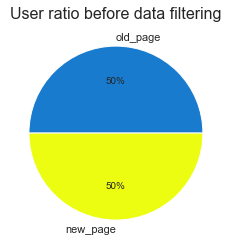

<Figure size 432x288 with 0 Axes>

In [12]:
sns.set(rc={'figure.figsize':(6, 6)}) 

data = np.array([quantity_of_users.landing_page[1], quantity_of_users.landing_page[1]])
mylabels = ['old_page', 'new_page']
plt.pie(data, labels=mylabels, autopct='%1.0f%%',  colors=['#187bcd','#ecfd12'])
plt.title('User ratio before data filtering', fontsize=16)
plt.figure()

<br>
In our data, the control group must correspond to old_page, and the treatment group must correspond to new_page, if we have something else, then this must be deleted
<br>

In [14]:
df_unnecessary = df.groupby(['group', 'landing_page']).agg({'landing_page': 'count'})

In [15]:
df_unnecessary

landing_page
group     landing_page              
control   new_page              1928
          old_page            145274
treatment new_page            145315
          old_page              1965

In [16]:
index_del1 = df[(df.group == 'control') & (df.landing_page == 'new_page')].index
index_del2 = df[(df.group == 'treatment') & (df.landing_page == 'old_page')].index

In [17]:
df = df.drop(index_del1, axis=0).drop(index_del2, axis=0)

<br>Let's plot the distribution of users after filtering the data<br>

In [18]:
quantity_of_users = df.groupby('landing_page', as_index = False).agg({'landing_page': "count"})
data = np.array([quantity_of_users.landing_page[1], quantity_of_users.landing_page[1]])
mylabels = ['old_page', 'new_page']

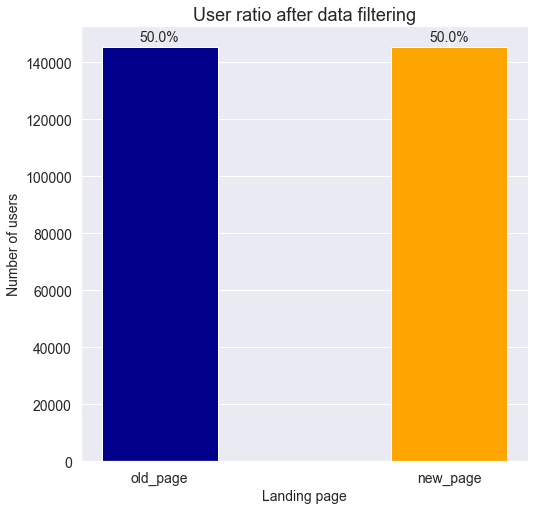

In [59]:
sns.set(rc={'figure.figsize':(8, 8)}) 

x = mylabels
y = quantity_of_users.landing_page

fig, ax = plt.subplots()

ax.bar(x, y, color=['darkblue', 'orange'], width = 0.4)

for p in ax.patches:
    percentage = '{:.1f}%'.format(quantity_of_users.landing_page.loc[0]/df.shape[0]*100)
    ax.annotate(percentage,  
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14)

plt.title('User ratio after data filtering', fontsize=18)

plt.xlabel('Landing page', fontsize=14)
plt.ylabel('Number of users', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

<br>To find out from which country the most users come to us, let's build a bar graph, which will immediately show the differences based on the height difference<br

In [57]:
df_graphe = pd.crosstab([df.country,df.group],df.converted,margins=True)
df_graphe

converted               0      1     All
country group                           
CA      control      6343    855    7198
        treatment    6484    817    7301
UK      control     31996   4364   36360
        treatment   31731   4375   36106
US      control     89446  12270  101716
        treatment   89836  12072  101908
All                255836  34753  290589

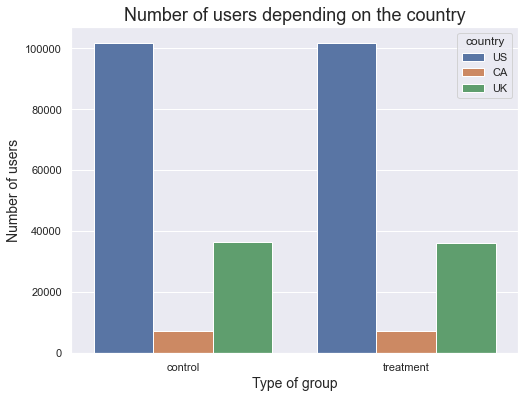

In [21]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data=df,x="group", hue="country")

plt.title(f"Number of users depending on the country", fontsize=18)
plt.xlabel('Type of group', fontsize=14)
plt.ylabel('Number of users', fontsize=14)
plt.show()

<h2><font style="font-weight:lighter", color='960018'>Analysis</font></h2>

We'll pretend that, we're running an experiment from scratch, so we set all values ourselves, and then calculate the necessary sample size, we then extract a sample from the dataset we have.<br><br>
We set an MDE to 1%, this means, the current conversion rate is 12%, and we want that the new home page increase the conversion rate to at least 13%.
We don't know what impact could the new home page have, we have to use a two tailed test:<br><br>

<ul>
<li>H0: there is no difference in mean between groups by group and countries</li>
<li>H1: there is difference in mean between groups by group and countries</li>
</ul>

α = 0.05<br>
power = 0.8<br>
Using these values we can calculate the sample size:

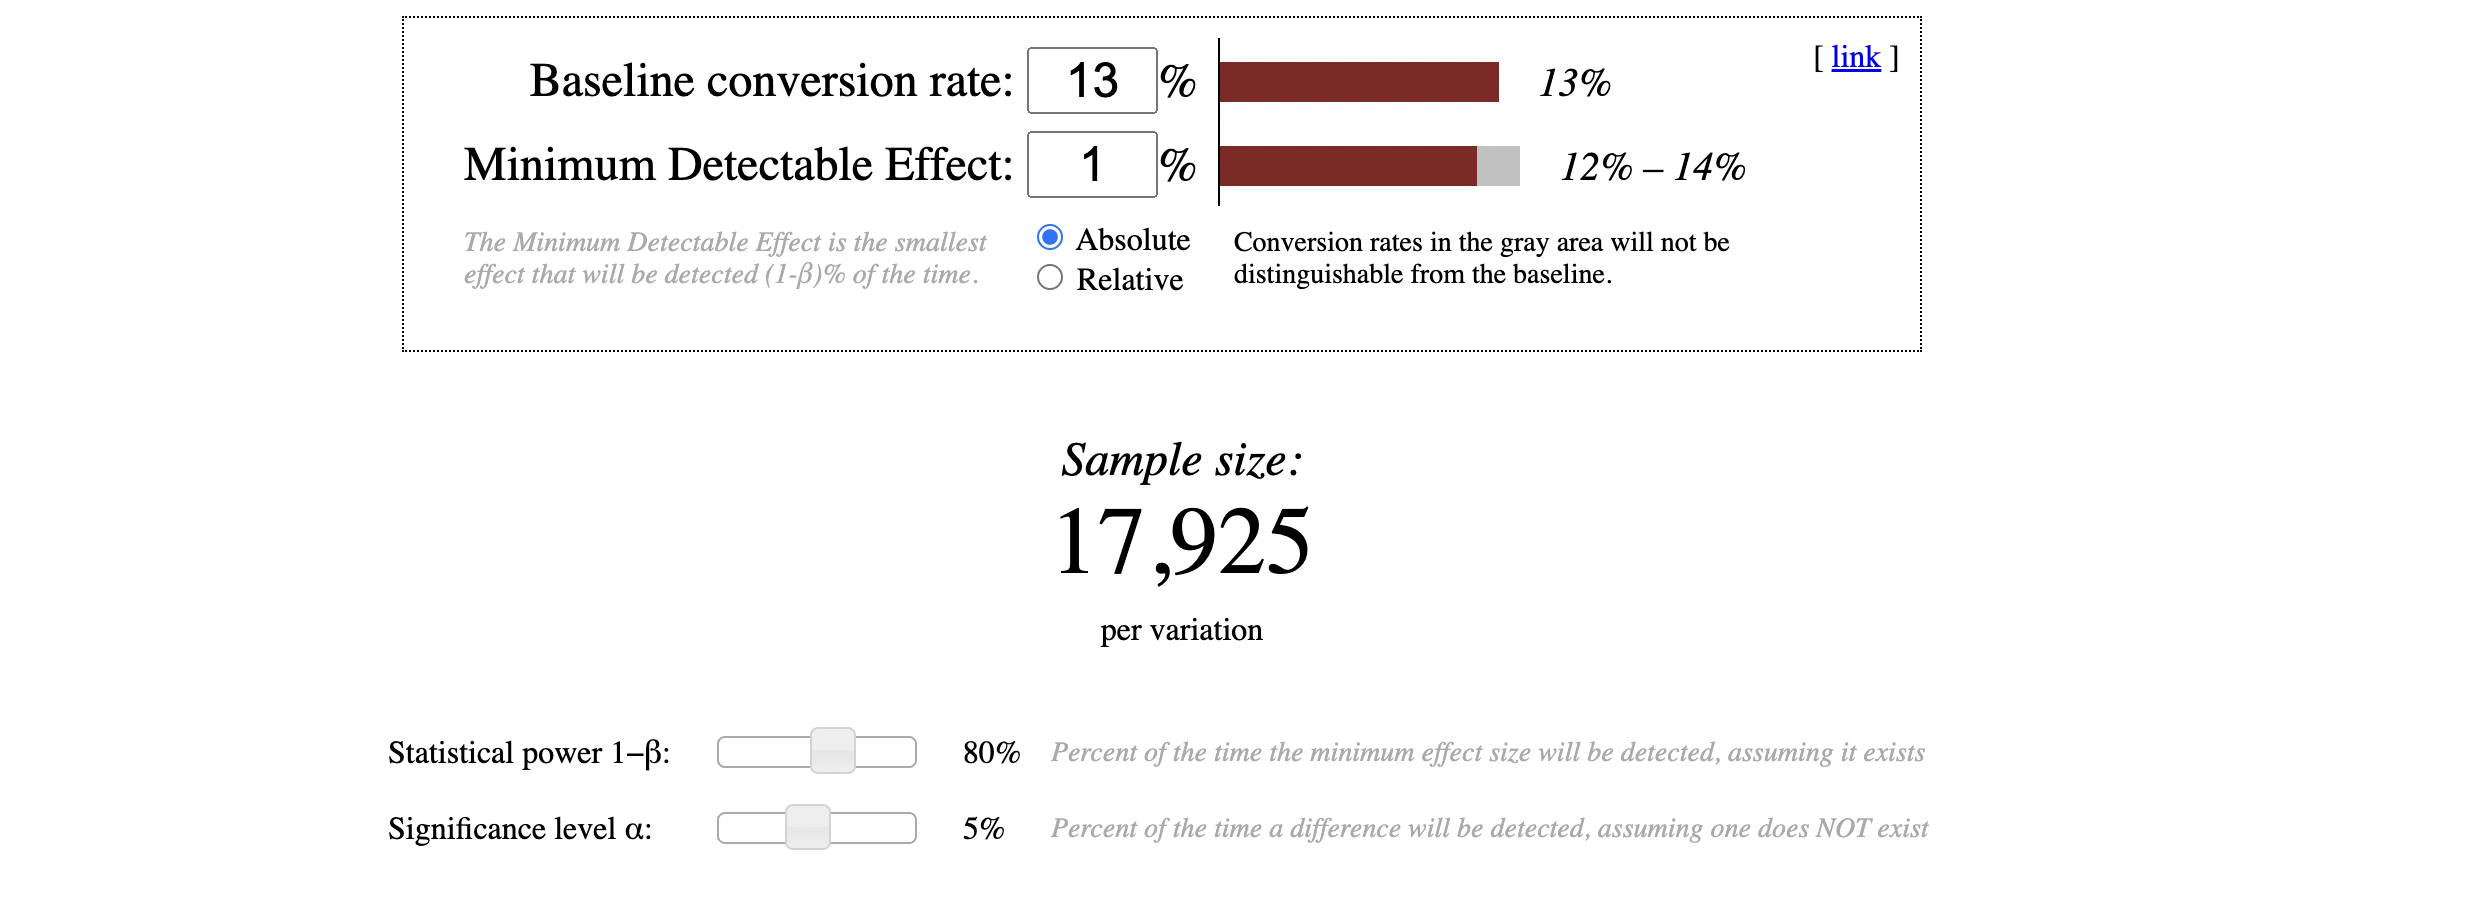

So the sample size that allows detecting a difference of at least 1% is 17925

I use the sklearn library which can easily split the data

In [60]:
from sklearn.model_selection import train_test_split

X, df_test, Y, y = train_test_split(df, df, test_size=round(2*17925/df.shape[0],3))

In [61]:
print(f'Shape of Test DataFrame: {df_test.shape}')

Shape of Test DataFrame: (35743, 6)


In [62]:
df_test.groupby('group').agg({'landing_page': 'count', 'converted': 'sum'})

,landing_page,converted
group,,
control,17908,2134
treatment,17835,2130


In [63]:
ab_info = [[17805, 17938], [2147, 2104]]

<br>We will conduct several tests to compare the results, first of all I am interested in p_value, which makes it possible to determine the data obtained as a result of chance or regularity<br>

In [64]:
stat, p, dof, expected = stats.chi2_contingency(ab_info)
prob = 0.8
alpha = 0.05
print(f' p_value is: {p}\n degree of free: {dof}\n stat: {stat}\n')

 p_value is: 0.40281245305071167
 degree of free: 1
 stat: 0.6999144164533401



In [65]:
odd_ratio, p_value = stats.fisher_exact(ab_info)
print(" p_value is: " + str(p_value)+'\n')

 p_value is: 0.3988803847731397



I also used the AB Testguide site, popular among analysts, which also calculates p_value and other important parameters for us based on the conversion of a certain number of users

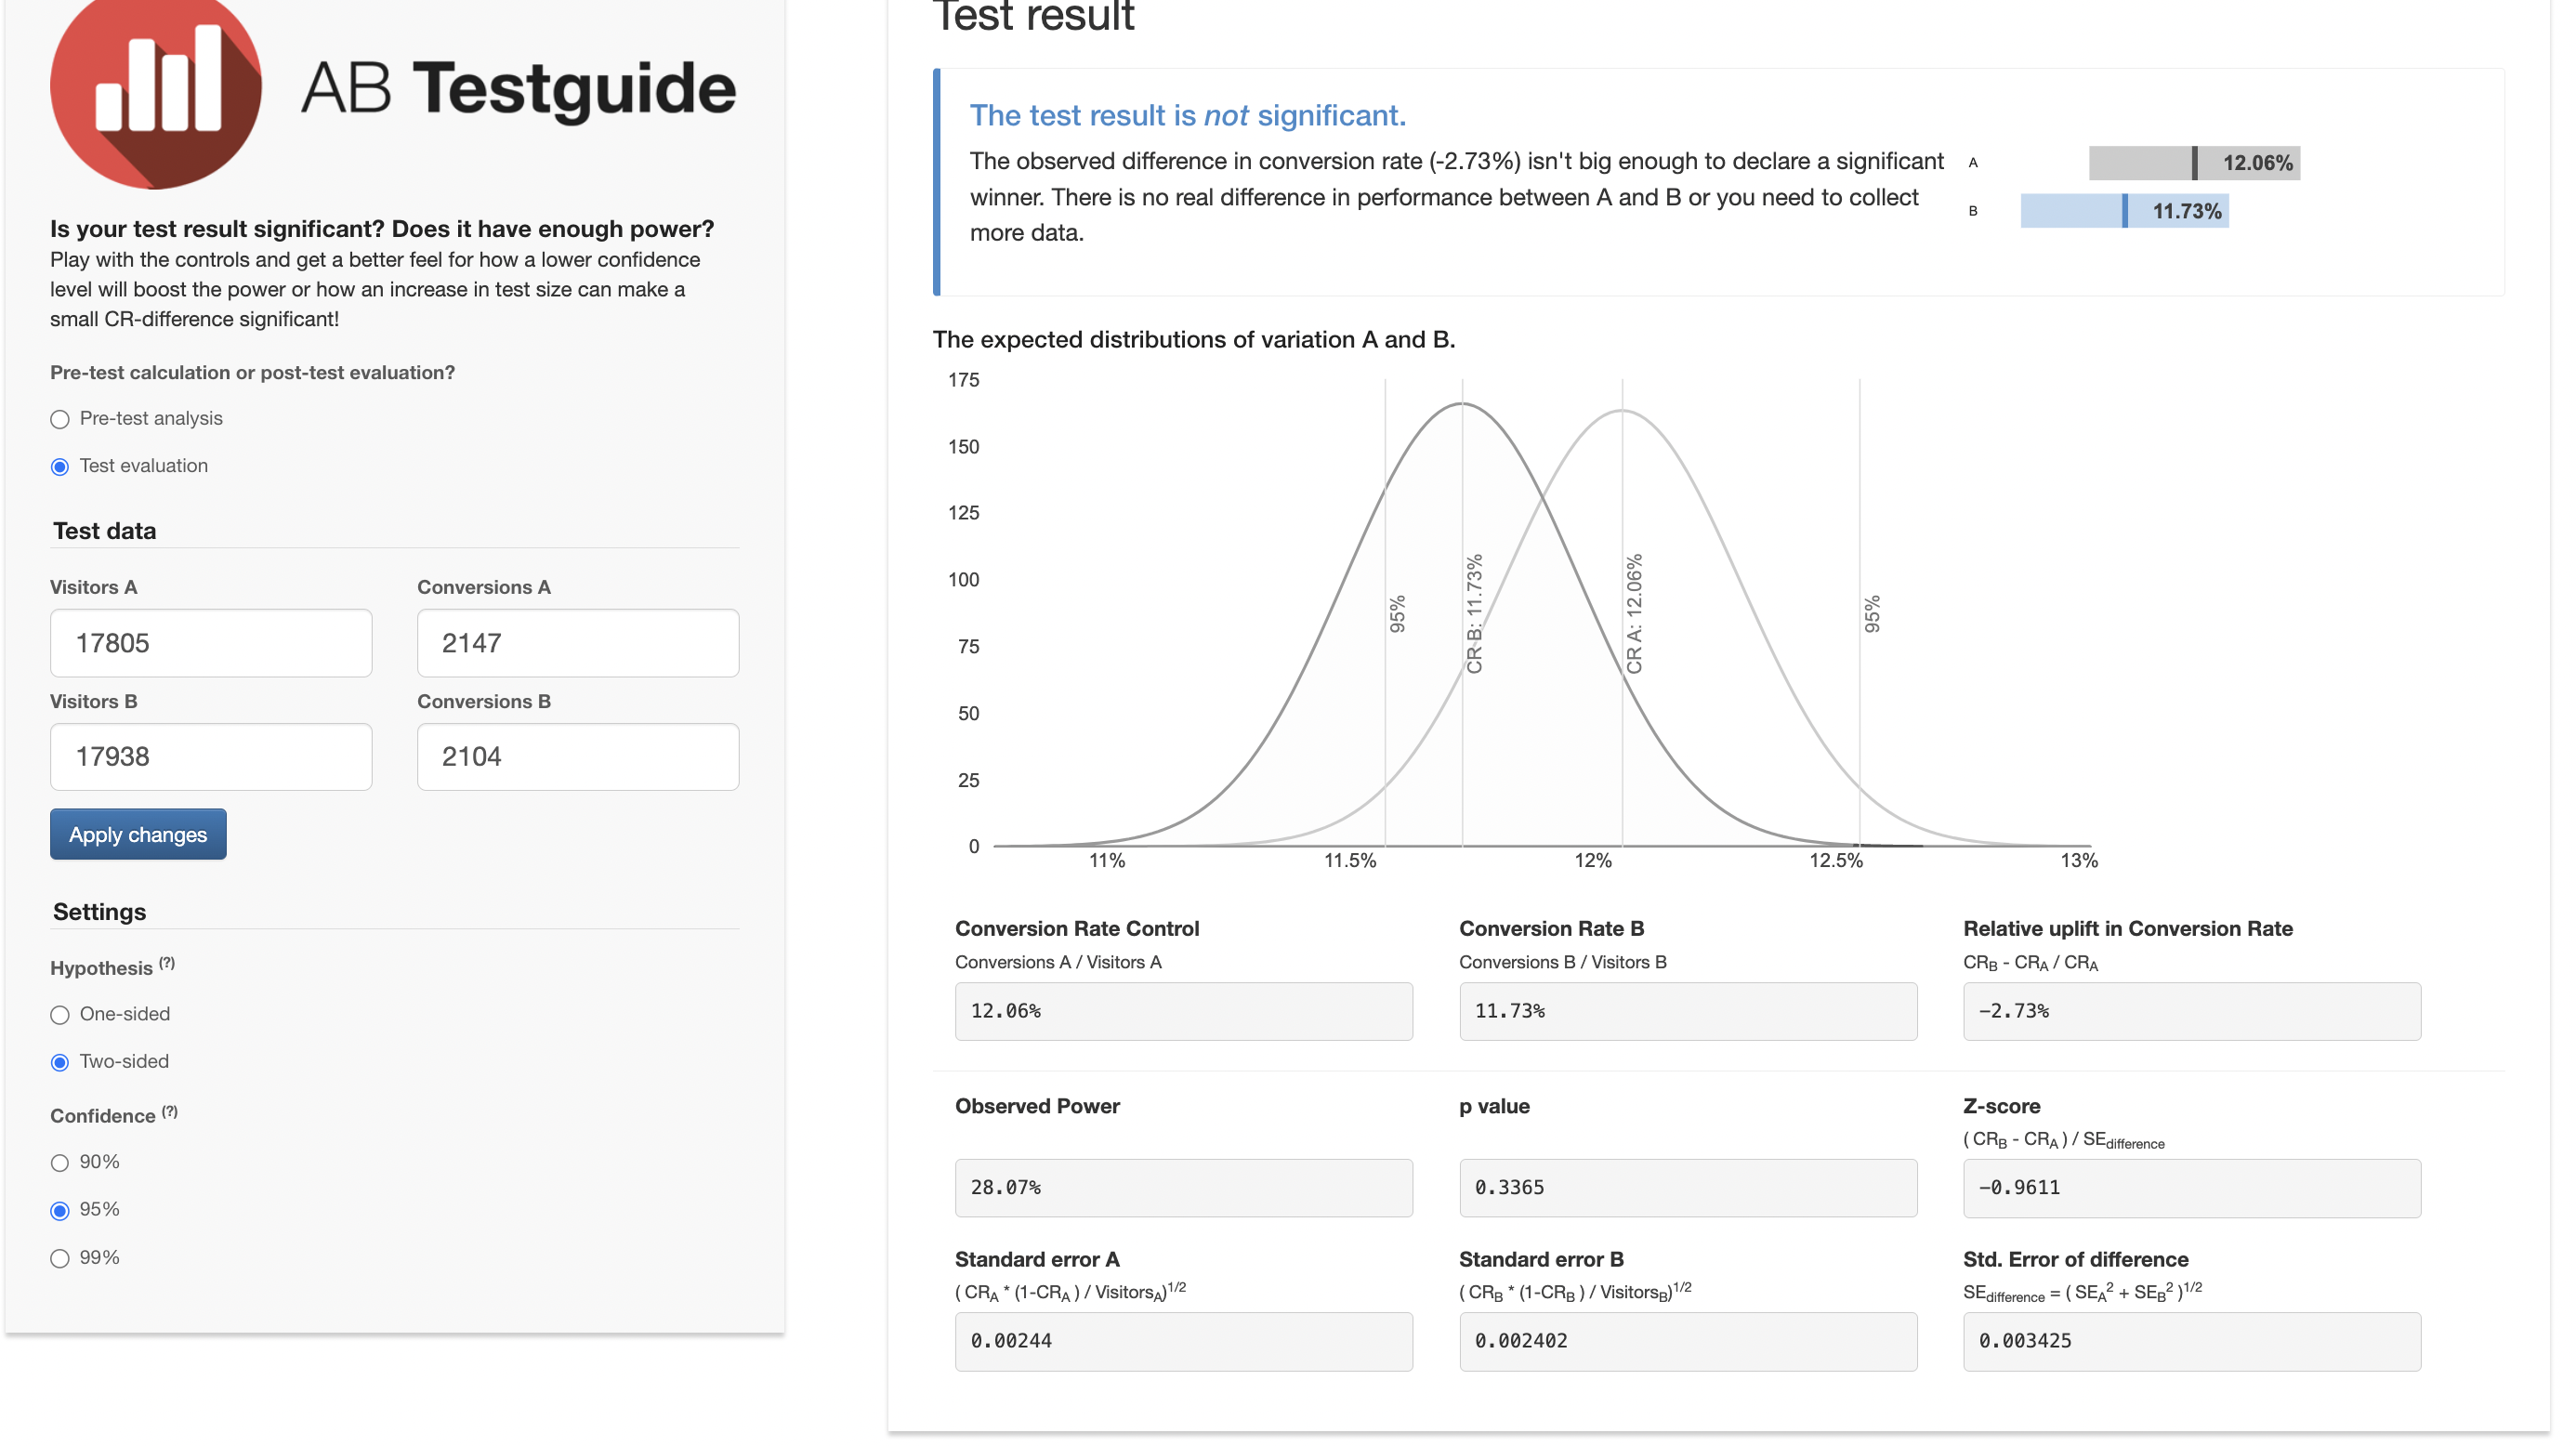

<h2><font style="font-weight:lighter", color='960018'>Result</font></h2><br>
The p-value = 0.4 which means we can't reject H0, this means that the new home page has statistically no effect, and the difference we saw is only due to chance